# 基于相关噪声模型的d=3 surface code 最大似然法量子纠错示例

在过去的量子纠错解码工作中，我们常常使用逻辑比特的错误率之类的噪声信息来进行解码优化，但是这就假设了不同逻辑比特之间的出错是独立的。
为了进一步利用噪声模型信息进行解码，我们采用了具备相关性的噪声信息，来进行最大似然法解码（Maximum Likelihood Decoding, MLD）。


## 1. 噪声模型

### 1.1 噪声模型

在目前的工作中，我们考虑了在surface code电路中的CNOT门会引入一个二维的去极化噪声（depolarizing noise），并且H门会引入一个一维的depolarizing噪声。

其中噪声的参数，我们一般设置为0.01和0.001，分别对应CNOT门和H门引入的噪声的去极化参数（depolarizing param），这与Google的量子计算机的噪声刻画处于数量级一致。

### 1.2 边缘噪声信息
在加权MWPM和UF解码算法中，常常使用逻辑比特的边缘噪声信息（即每个逻辑比特的泡利错误率）来进行加权解码。

同时在TNML解码算法中，也是使用每个逻辑比特的泡利错误率来作为节点的参数，来进行张量收缩。

### 1.3 相关噪声信息
由于CNOT的，会导致逻辑比特之间的泡利错误本质上存在一定的相关性，因此我们考虑了逻辑比特之间的相关噪声信息（即逻辑比特和测量比特的多比特泡利算符），来进一步优化解码算法。

## 2. 最大似然法解码

### 2.1 最大似然法解码
最大似然法解码，是一种基于噪声信息的最大概率解码方法。在解码过程中，我们首先根据噪声信息，来比较出现泡利错误和不出现泡利错误的概率，来判断该逻辑算符是否出现泡利错误。

理论上，利用更加准确的噪声信息，应该能够得到更加准确的解码效果。

## 实验步骤一：构建d=3的surface code量子电路

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from d_3_surface_code import get_d_3_surface_code

d:\anaconda\envs\quantum-RB\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


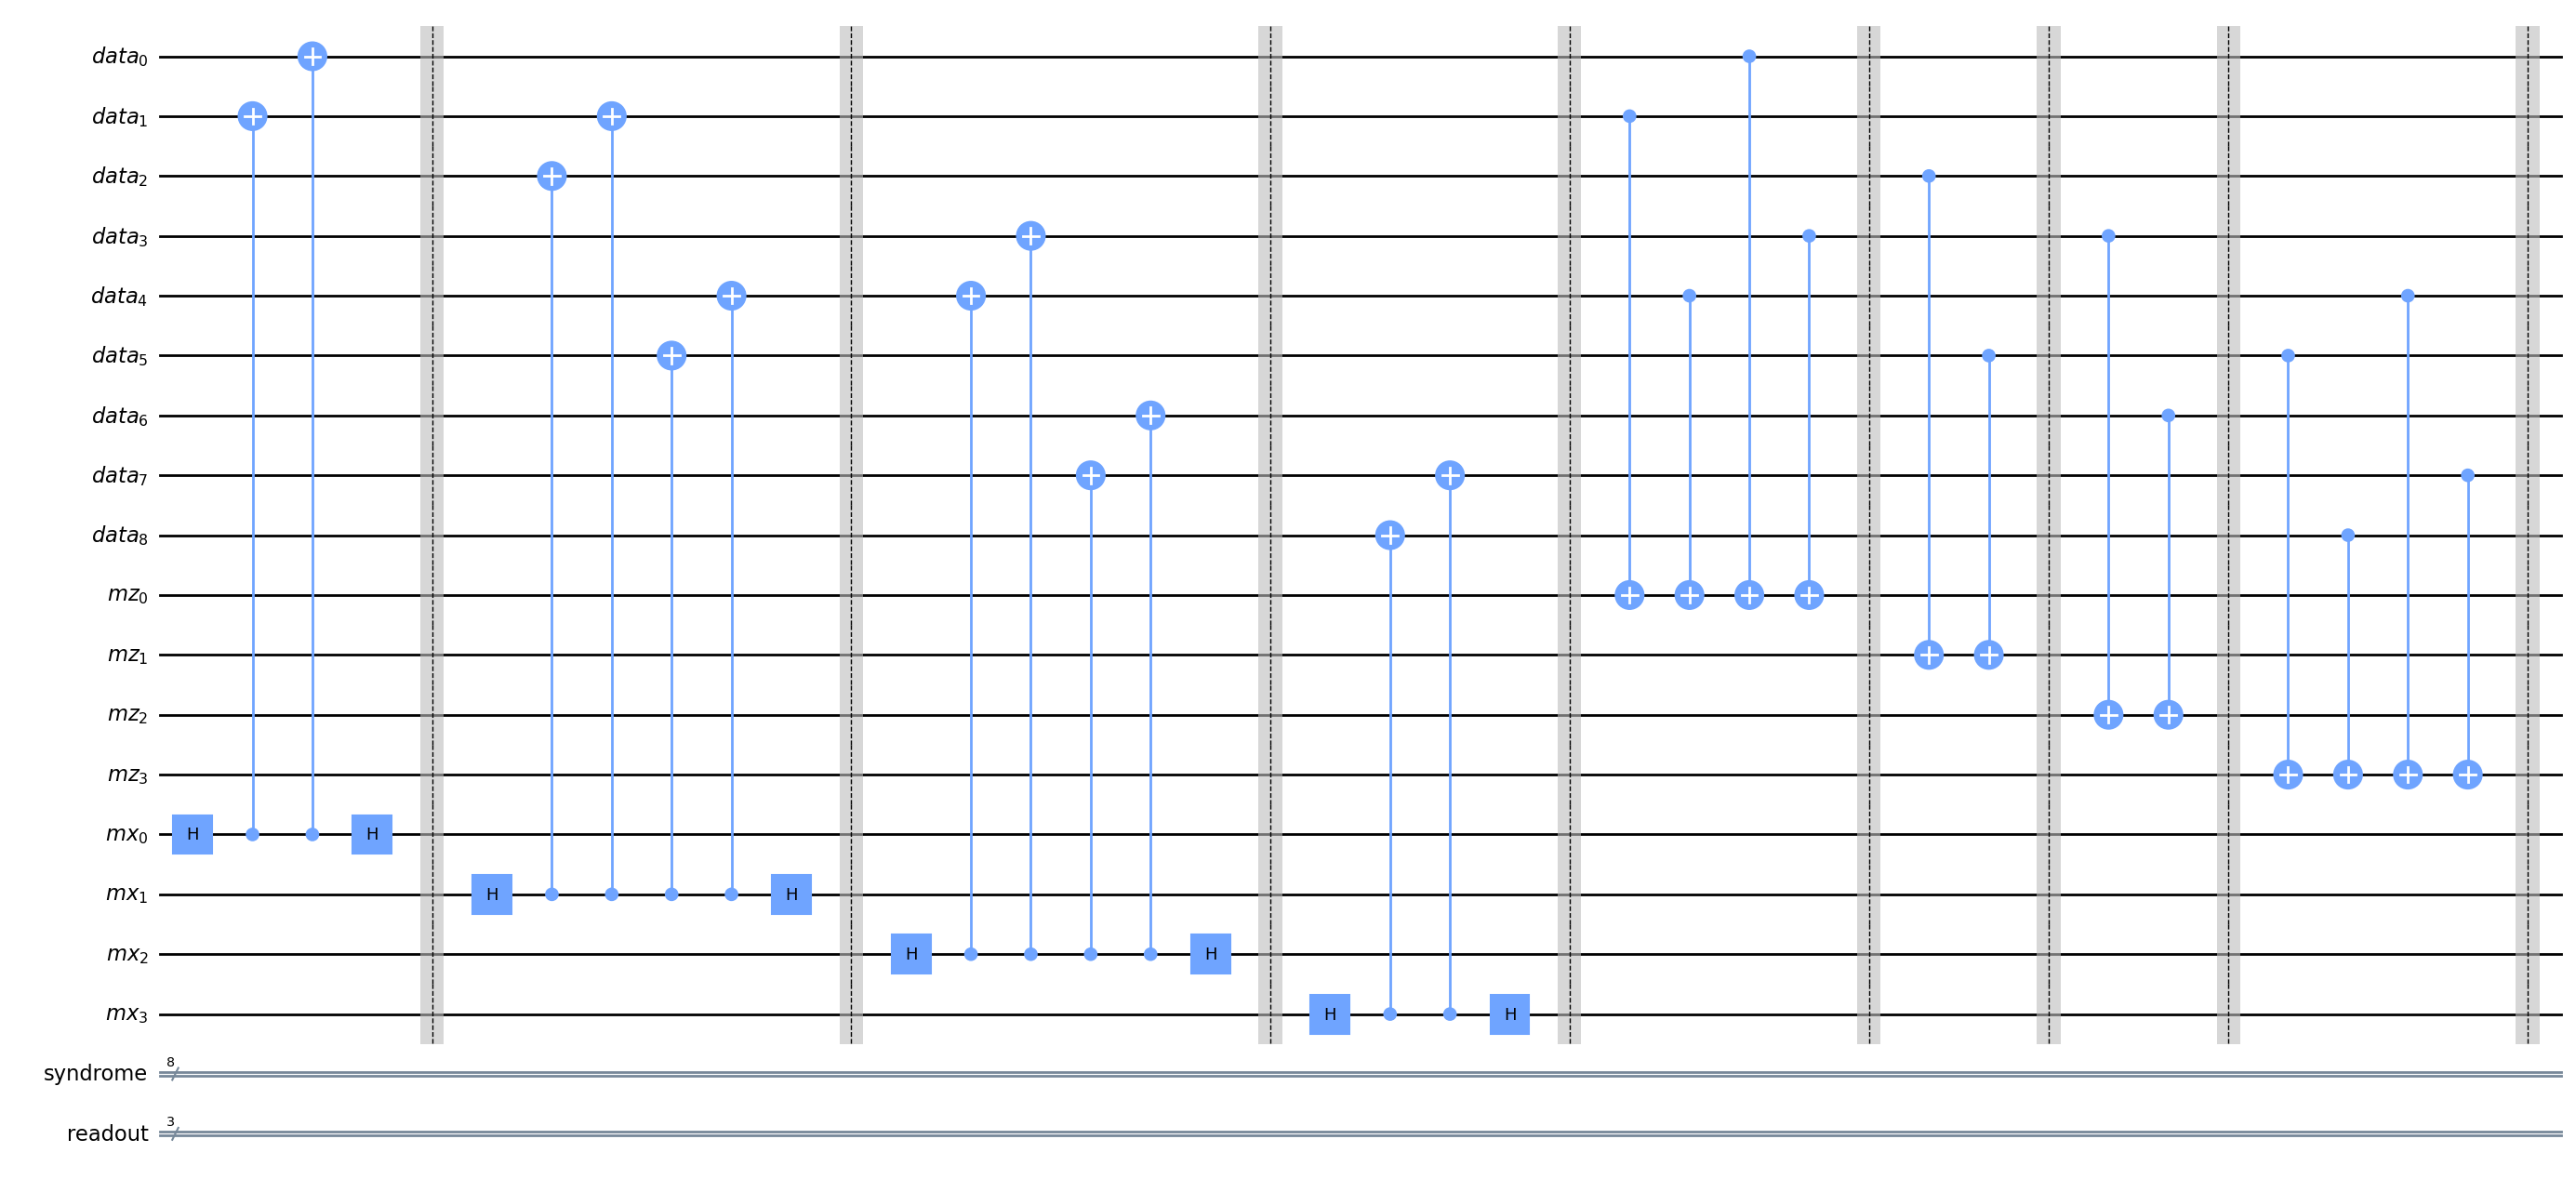

In [2]:
# 逻辑比特
data = QuantumRegister(9, name='data')
# mx和mz测量比特
mx = QuantumRegister(4, name='mx')
mz = QuantumRegister(4, name='mz')

# mx和mz测量比特对应测量值和逻辑比特对应测量值
c0 = ClassicalRegister(8, name="syndrome")
c1 = ClassicalRegister(3,name="readout")

base_circ = QuantumCircuit(data, mz, mx, c0, c1)

circ = get_d_3_surface_code(base_circuit=base_circ, data=data, mx=mx, mz=mz)
circ.draw(output='mpl', fold=100)

## 实验步骤二：构建噪声模型

In [3]:
from circuit_level_depolarizing_noise_model import get_physical_error_rate, get_noise_model

physical_error_rate = get_physical_error_rate(num_qubits=17, cnot_error=0.01, h_error=0.001)

noise_model = get_noise_model(physical_error_rate=physical_error_rate, i_error=0.0)

## 实验步骤三：基准测试

对上述噪声模型下的d=3 surface code量子电路进行基准测试，即使用MLD算法来对量子电路进行解码，并计算解码后的逻辑错误率。


给电路添加测量操作，我们根据测量比特值（即syndrome值）进行解码，判断是否出现逻辑错误，如果出现错误则对逻辑态进行纠错，最终计算纠错之后的逻辑错误率。

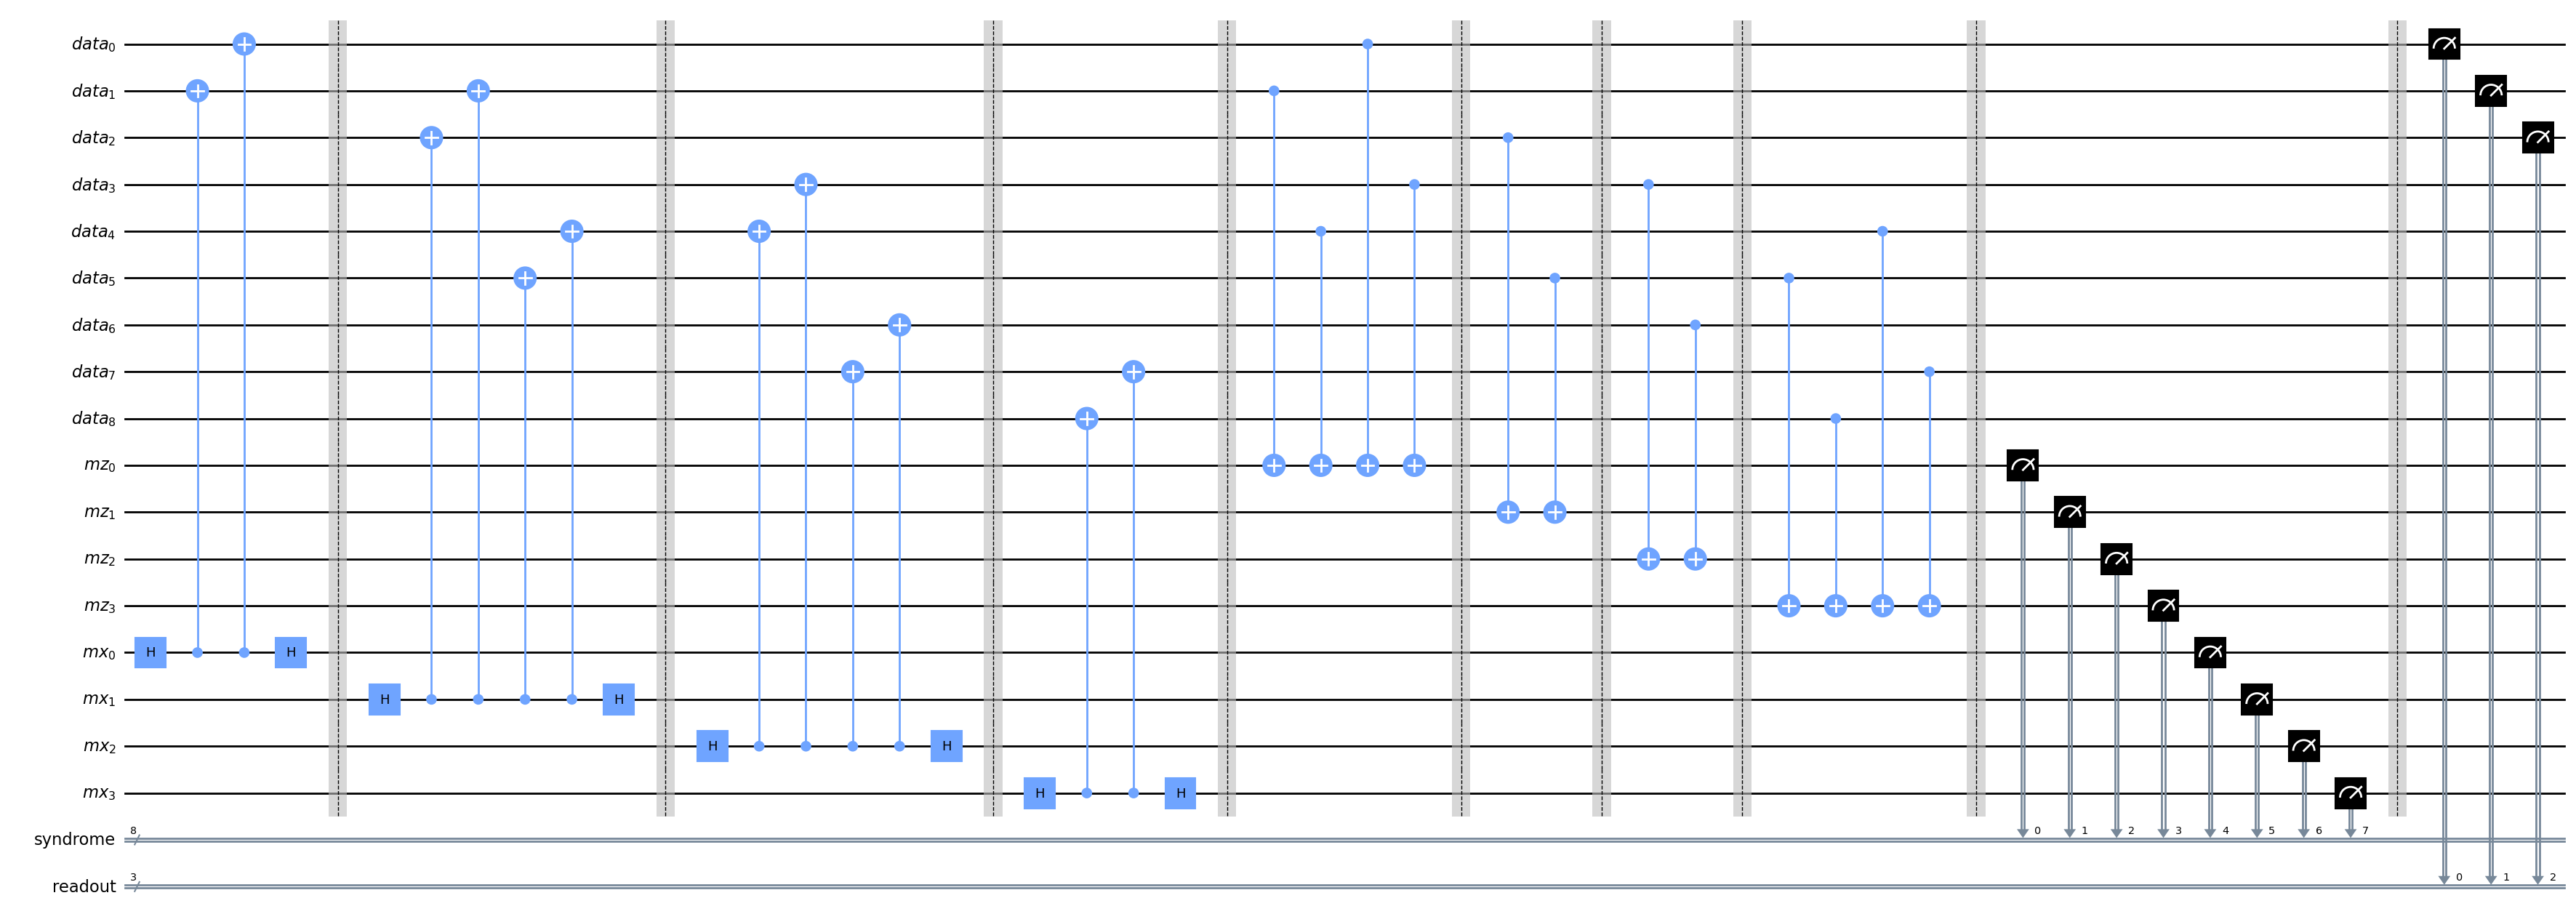

In [4]:
from d_3_surface_code import measurement, readout_z

# 测量测量比特
circ = measurement(circ=circ, mx=mx, mz=mz, c0=c0)
# 测量逻辑X态
circ = readout_z(circ=circ, data=data, c1=c1)

circ.draw(output='mpl', fold=100)

调用benchmark函数，对上述量子电路进行多次运行、解码以及纠错，计算纠错出错占所有实验次数的比例，这就是量子纠错的逻辑错误率。

In [5]:
from benchmark import d_3_surface_code_mld_benchmark

tool = d_3_surface_code_mld_benchmark(
    decoder="mld",
    circ=circ,
    noise_model_func=get_noise_model,
    correct_logical_value = 0
)

运行实验，其中我们总共重复100,000次实验，以确保结果的准确性。

普通计算机大约运行40s左右，大部分花费量子电路的运行中。

In [7]:
logical_error_rate = tool.single(physical_error_rate = physical_error_rate, i_error=0.00, save_data=False, shots=100000)

逻辑错误率:0.02311
Done simulating physical_error_rate: {'cx': {(0, 1): 0.01, (1, 0): 0.01, (0, 2): 0.01, (2, 0): 0.01, (0, 3): 0.01, (3, 0): 0.01, (0, 4): 0.01, (4, 0): 0.01, (0, 5): 0.01, (5, 0): 0.01, (0, 6): 0.01, (6, 0): 0.01, (0, 7): 0.01, (7, 0): 0.01, (0, 8): 0.01, (8, 0): 0.01, (0, 9): 0.01, (9, 0): 0.01, (0, 10): 0.01, (10, 0): 0.01, (0, 11): 0.01, (11, 0): 0.01, (0, 12): 0.01, (12, 0): 0.01, (0, 13): 0.01, (13, 0): 0.01, (0, 14): 0.01, (14, 0): 0.01, (0, 15): 0.01, (15, 0): 0.01, (0, 16): 0.01, (16, 0): 0.01, (1, 2): 0.01, (2, 1): 0.01, (1, 3): 0.01, (3, 1): 0.01, (1, 4): 0.01, (4, 1): 0.01, (1, 5): 0.01, (5, 1): 0.01, (1, 6): 0.01, (6, 1): 0.01, (1, 7): 0.01, (7, 1): 0.01, (1, 8): 0.01, (8, 1): 0.01, (1, 9): 0.01, (9, 1): 0.01, (1, 10): 0.01, (10, 1): 0.01, (1, 11): 0.01, (11, 1): 0.01, (1, 12): 0.01, (12, 1): 0.01, (1, 13): 0.01, (13, 1): 0.01, (1, 14): 0.01, (14, 1): 0.01, (1, 15): 0.01, (15, 1): 0.01, (1, 16): 0.01, (16, 1): 0.01, (2, 3): 0.01, (3, 2): 0.01, (2, 4): 0.01, (4,

注意：上述的look up table是根据量子电路的测量数据，来计算出来的，因此需要运行量子电路才能得到。
在后续的工作中，我们希望能够根据泡利算符和clifford算符之间的共轭关系，直接根据噪声参数和噪声模型以及电路，来计算look up table，从而可用于无法运行多次量子电路，但是已经量子参数的情况下的解码。